#  **Heart Failure Clinical Records Dataset Exploratory Data Analysis (EDA)**

**Objective**  
Gain deep insight into the UCI Heart Failure Clinical Records dataset before modeling.

In [1]:
import warnings


import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from ucimlrepo import fetch_ucirepo


sns.set(style='whitegrid', font_scale=1.2)


warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
repo = fetch_ucirepo(id=519)
X_raw = repo.data.features
y_raw = repo.data.targets
df = pd.concat([X_raw, y_raw], axis=1)

In [3]:
print(f"Dataset dimensions is  {df.shape[0]} rows ×  {df.shape[1]}  columns")

Dataset dimensions is  299 rows ×  13  columns


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
df.info()


Dataset contains 299 rows and 13 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(1

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
binary_features = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype in ['int64', 'int32']]
print("Binary features are", binary_features)

Binary features are ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']


In [8]:
print("Non-binary numerical features are", [col for col in df.columns if col not in binary_features + ['death_event']])

Non-binary numerical features are ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


## **Univariate Analysis**


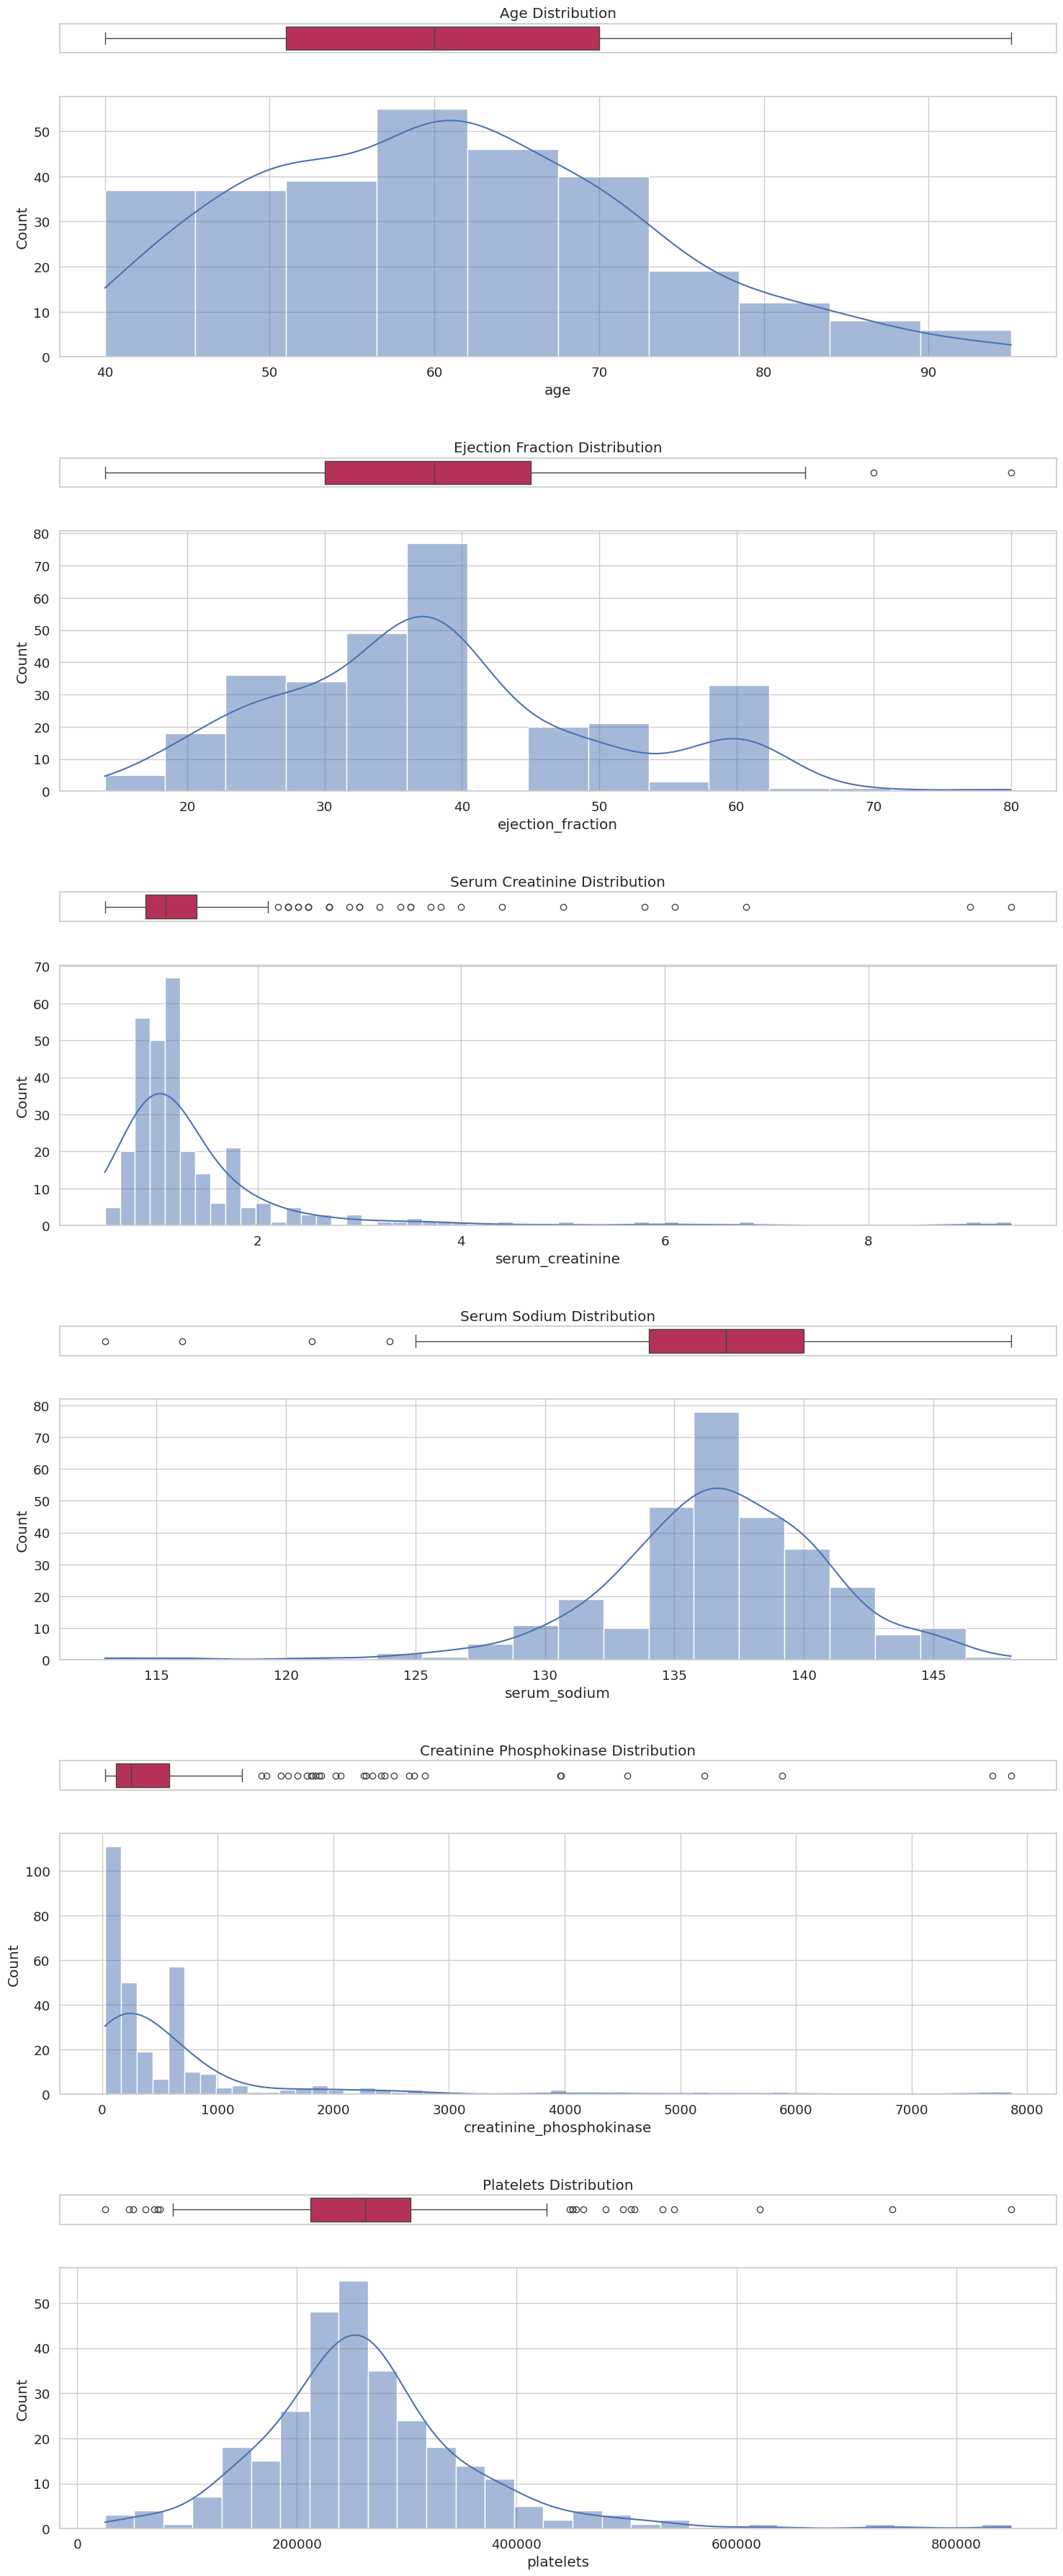

In [9]:
continuous_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase', 'platelets']

fig = plt.figure(figsize=(15, 6 * len(continuous_vars)))

for i, col in enumerate(continuous_vars):
    clean_col_name = col.replace('_', ' ').title()

    gs = gridspec.GridSpec(len(continuous_vars), 1, height_ratios=[1]*len(continuous_vars)) 
    sub_gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[i], height_ratios=[1, 9]) 
    
    ax_box = plt.subplot(sub_gs[0])
    ax_hist = plt.subplot(sub_gs[1])

    sns.boxplot(x=df[col], ax=ax_box, linewidth=1, palette='rocket')
    sns.histplot(df[col], ax=ax_hist, kde=True, palette='rocket')

    ax_box.set_title(f"{clean_col_name} Distribution")
    ax_box.set_xlabel('')
    ax_box.set_xticks([])  

plt.tight_layout(h_pad=3)
plt.show()


## **Binary Feature Distributions**

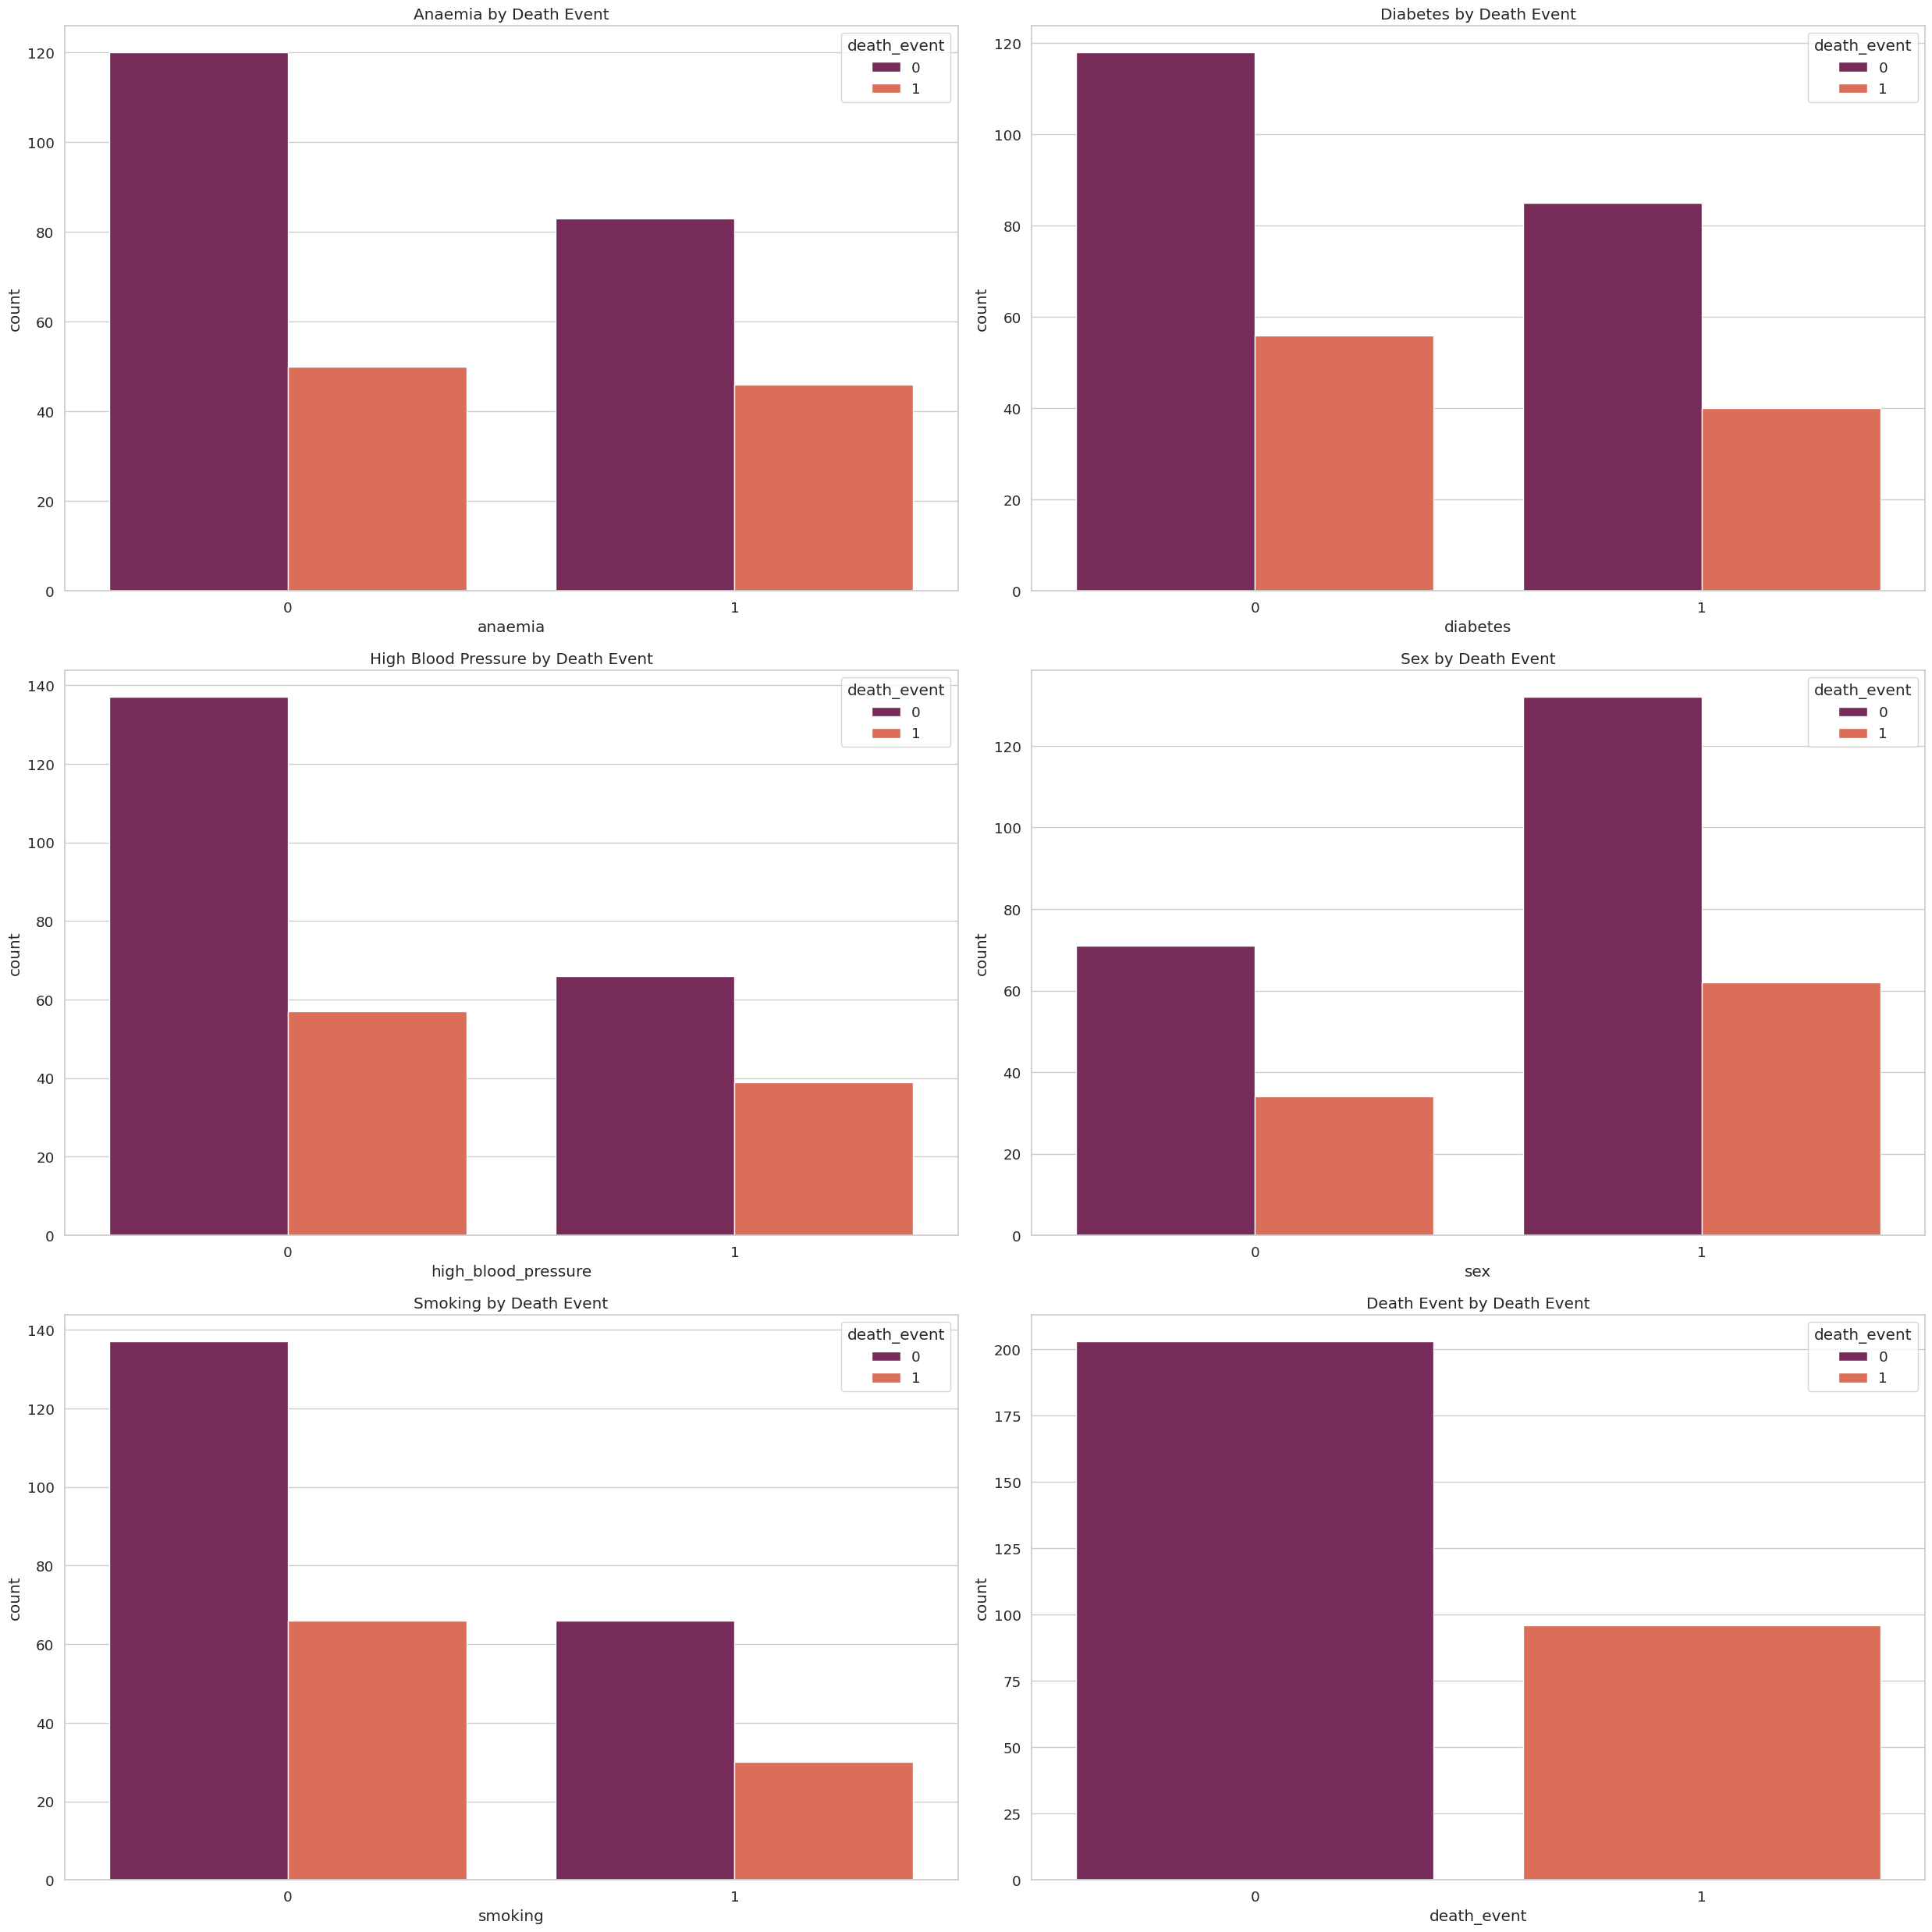

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(25, 25))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    clean_col_name = col.replace('_', ' ').title()
    sns.countplot(x=col, hue='death_event', data=df, ax=axes[i], palette='rocket')
    axes[i].set_title(f"{clean_col_name} by Death Event")

plt.tight_layout()


## **Grouped Comparisons by Death Event**
### **Continuous feature comparison between survivors vs non-survivors**

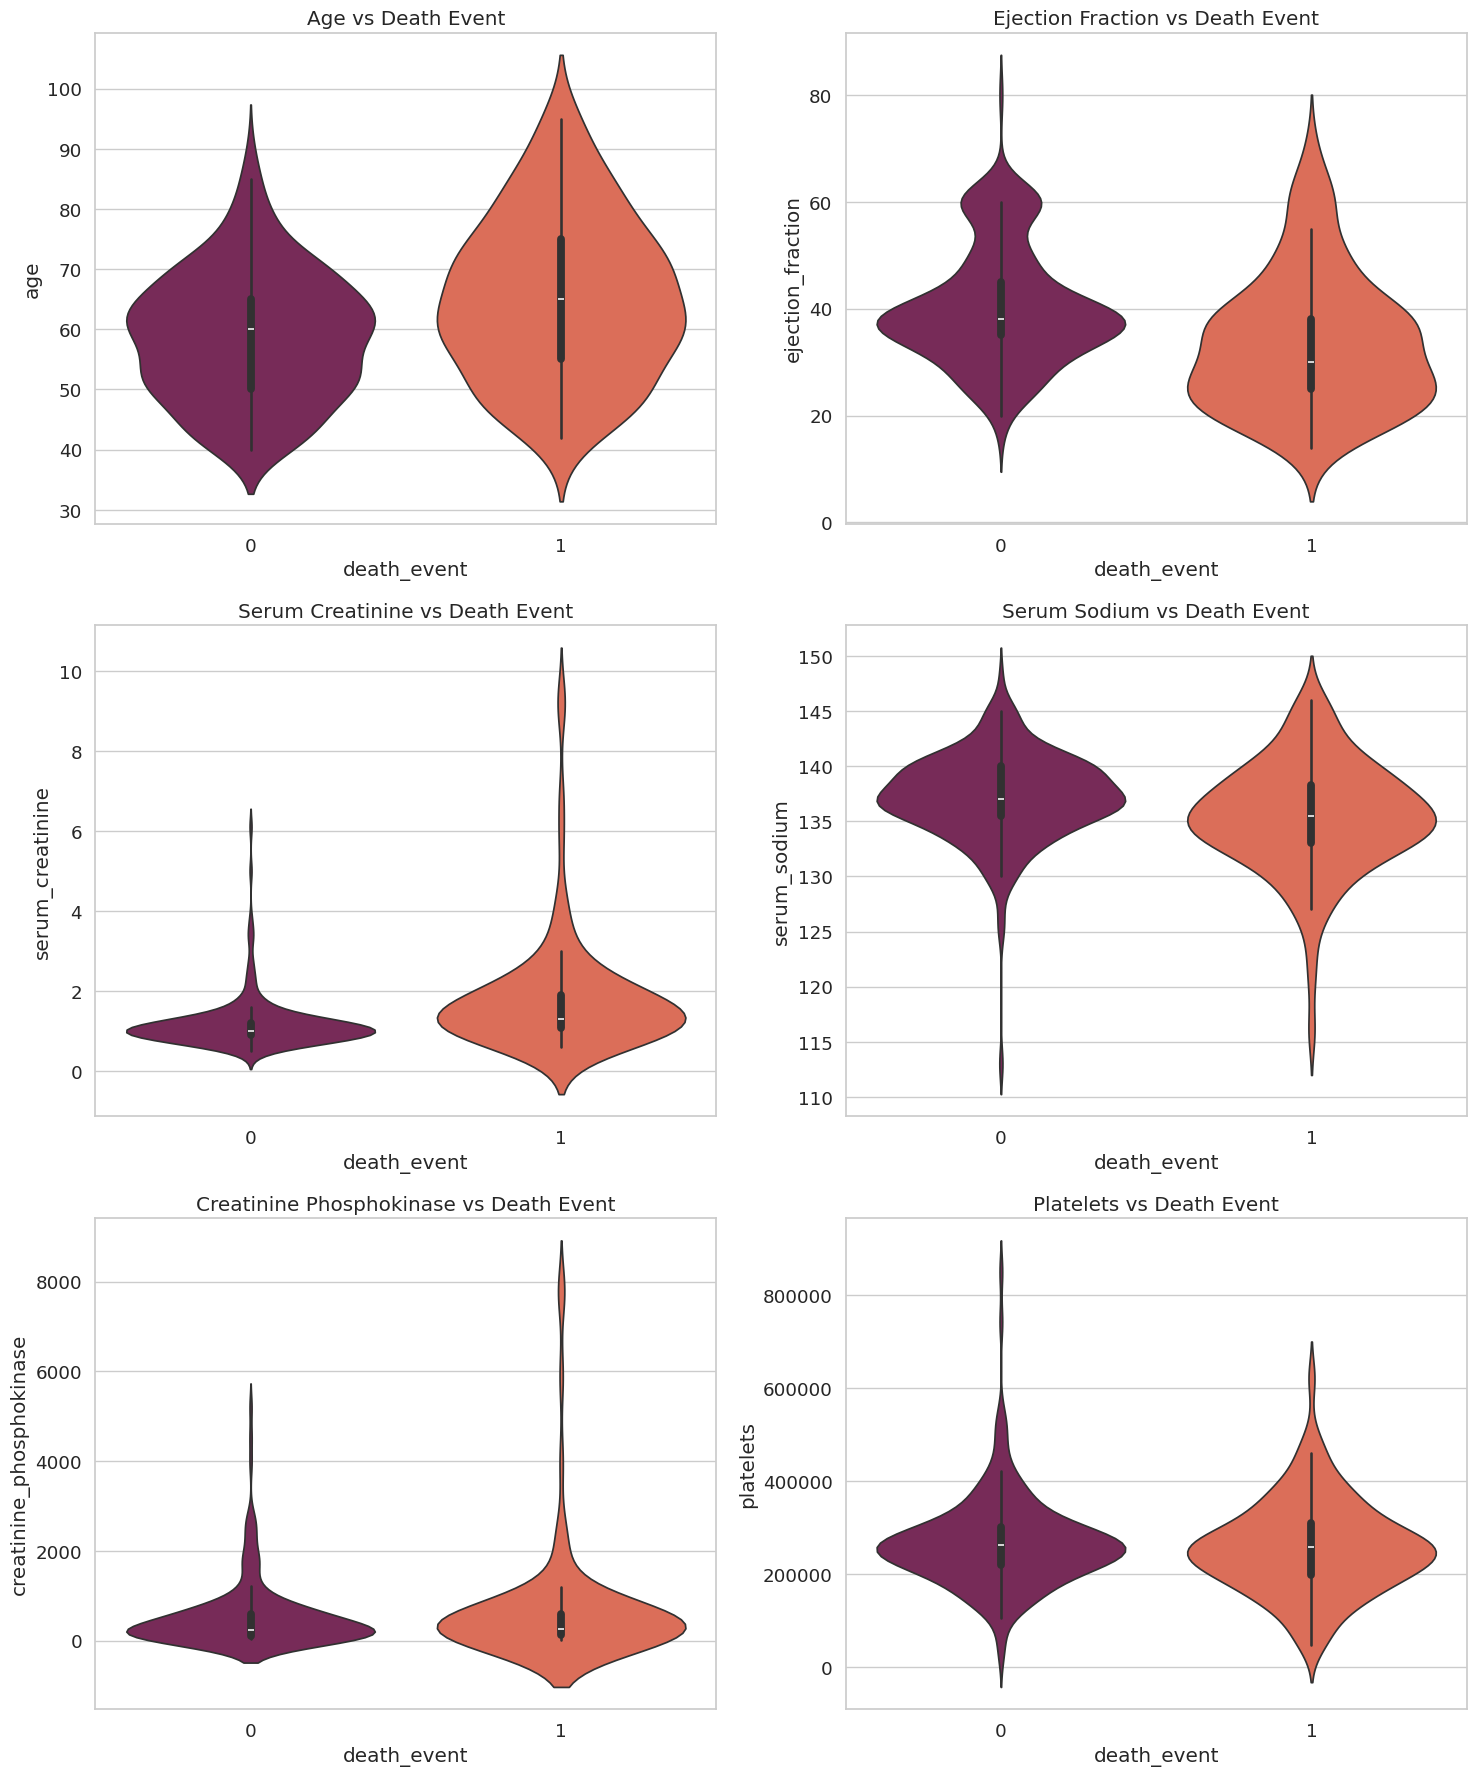

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    clean_col_name = col.replace('_', ' ').title()
    sns.violinplot(x='death_event', y=col, data=df, ax=axes[i], palette='rocket')
    axes[i].set_title(f"{clean_col_name} vs Death Event")

plt.tight_layout()


## **Correlation Matrix**

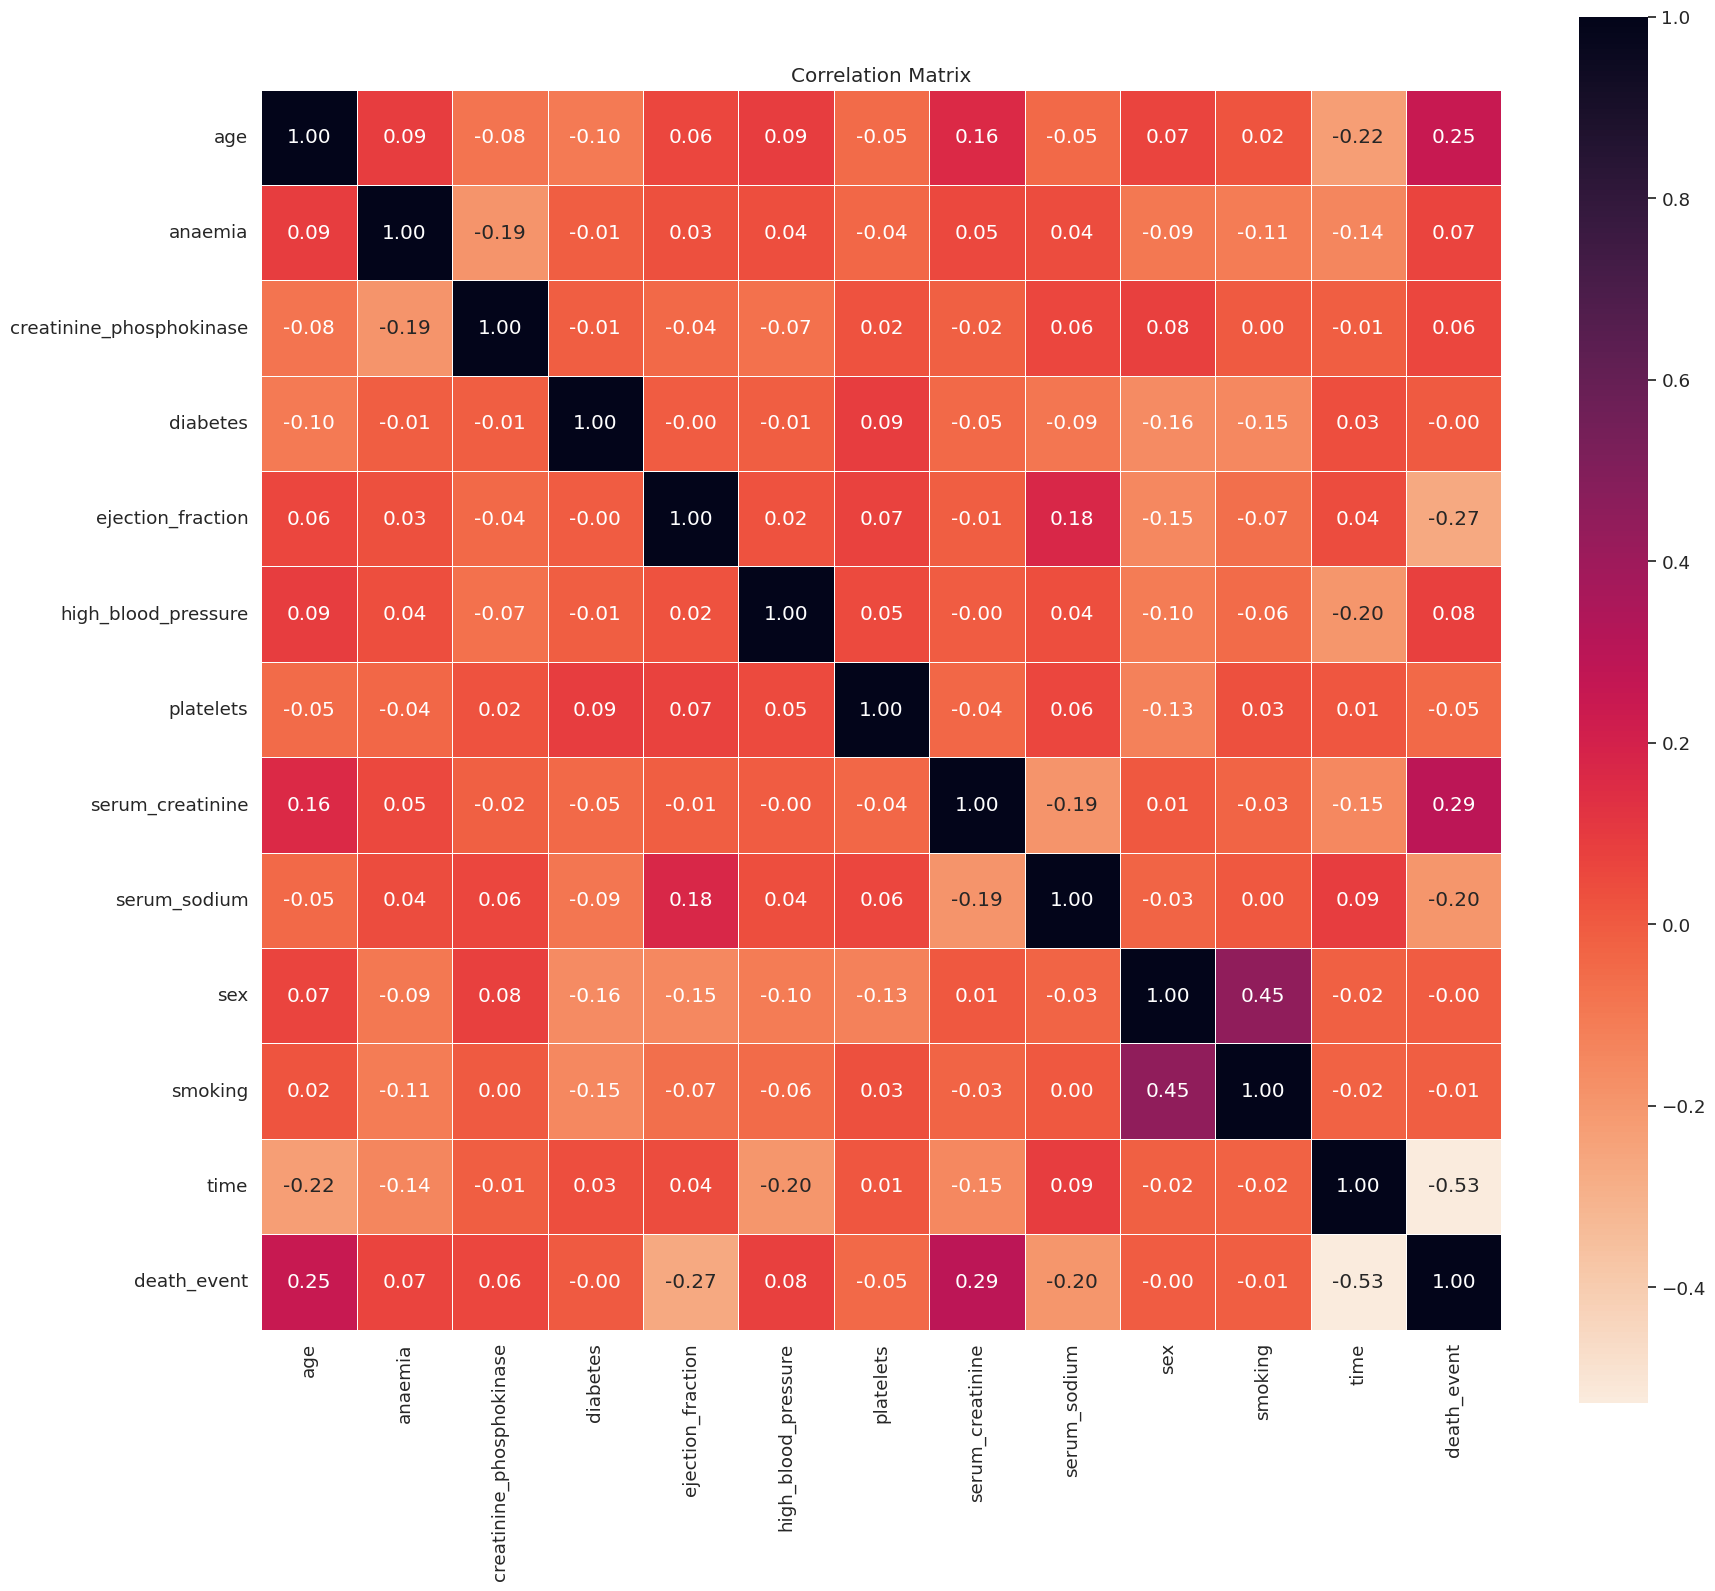

In [12]:

plt.figure(figsize=(20, 18))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='rocket_r', square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## **Clinical Observations**

- **Ejection Fraction (EF)**
  - Patients with an ejection fraction (EF) of less than 30% are predominantly found in the group with a recorded death_event = 1, indicating mortality. This highlights that EF < 30% serves as a strong clinical indicator of severe heart failure and is closely associated with poor patient outcomes.

- **Serum Creatinine**
  - Positively skewed. Higher creatinine often correlates with kidney dysfunction and increased mortality.

- **Age**
  - The group with death_event = 1 has a higher average age, suggesting that older patients are more likely to  experience mortality. Additionally, the age distribution in this group is right-skewed, indicating a greater concentration of older individuals among those who died.

- **Creatinine Phosphokinase (CPK)**
  - Extremely skewed. Consider log transform during preprocessing.

- **Binary Features**
  - High death rates are observed among patients with underlying conditions such as anaemia (low hemoglobin), diabetes, and high blood pressure. These comorbidities significantly contribute to adverse outcomes and are strongly associated with increased mortality in heart failure patients.


In [13]:
df.to_csv("../data/raw/heart_failure_clinical_records_dataset.csv", index=False)
